## Continuation of the previous jupyter, but now with PyTorch

        01-Perceptron-iris.ipynb
        
----------------------------------------------------------------------------------------------------------------


Brief description:

The problem we will solve with the perceptron involves classifying iris species based on their morphological characteristics. Specifically, we will use the perceptron to distinguish between two of the three iris species in the dataset.

In the previous jupyter, we used the numpy library to create a perceptron from scratch. Now we will use some more sophisticated tools that will facilitate the entire process.

#### Notebook Summary

* 1 - Learning to create a class in numpy

*  * 1.1 - How to create a perceptron class.
*  * 1.2 - Training the perceptron.

*  2 - Introduction to Pytorch library.
*  * 2.1 - Learning to create a perceptron.
*  * 2.2 - How to train a perceptron.
*  * 2.3 - How to Train using GPU.

# 1 - Learning to Create a Class in NumPy

## 1.0 Classes and Object-Oriented Programming

### Introduction to Classes in Python  

Python is an object-oriented programming language, which means it supports the use of **classes** to organize code into reusable components.  

A **class** is like a *blueprint* for creating objects, while an **object** is an instance of a class. Using classes, we can model complex data and functionality in an intuitive and accessible way.

---

### Defining a Class  

A class is defined using the `class` keyword, followed by the class name and a colon. Inside the class, we define functions called **methods**.  

The `__init__()` method is particularly important: it acts as a constructor and is called automatically when a new object of the class is created.

```python
class Car:
    def __init__(self, brand, model, year):
        self.brand = brand
        self.model = model
        self.year = year
```

In this example, Car is a class with an `__init__()` method that initializes three attributes: brand, model, and year. The word self is a reference to the current instance of the class and is used to access variables that belong to the class. To create an instance of a class, you call the class using the class name followed by parentheses, passing the arguments that the `__init__()` method accepts:



### Creating the instance:
```python
my_car = Car('Ford', 'Mustang', 2020)
```

Here, my_car is an object of the Car class. We can add other methods to the class to define additional behaviors:

```python
class Car:
    def __init__(self, brand, model, year):
        self.brand = brand
        self.model = model
        self.year = year

    def description(self):
        return f"{self.year} {self.brand} {self.model}"

    def age(self, current_year):
        return current_year - self.year
```

Now, the Car class has two additional methods: `description()` which returns a string describing the car, and `age()`, which calculates the age of the car.


* **Inheritance**: allows a class to inherit attributes and methods from another class. This is useful for creating subcategories that share common functionality.

```python
class ElectricCar(Car):
    def __init__(self, brand, model, year, range):
        super().__init__(brand, model, year)
        self.range = range

    def battery_description(self):
        return f"This car has a range of {self.range} km on a full charge."
```

The `ElectricCar` class inherits from `Car` and adds a new `range` attribute, plus a new method to describe the battery. Note that in this case we have `super().__init__( .... )` this command allows us to use the methods defined in the `Car()` class.

## 1.1 - How to create a perceptron class.

Let's repeat some of the steps from notebook **01-Perceptron-iris.ipynb**, but now using the class tool

In [1]:
# Import required libraries
import numpy as np  # Library for numerical operations on arrays and matrices
import matplotlib.pyplot as plt  # Library for creating graphs and visualizations

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Declaring the class as 

In [2]:
class Perceptron:
    def __init__(self, Input):
        self.input = Input

        # Weight and bias initialization
        self.weights = np.random.randn(Input.shape[1])
        self.bias = np.random.randn(1)

    def get_weights_bias(self):
        return self.weights, self.bias

We create a class called perceptron that creates the weights and bias. We also define a method that returns what the weights and bias are.

In [3]:
x = np.ones((10, 4))
neuron = Perceptron(x)
neuron

In [4]:
neuron.get_weights_bias()

(array([1.86997461, 1.37591478, 0.21866322, 0.36273593]), array([-1.0752771]))

In the previous Jupyter notebook, we learned that the perceptron has several other interesting functionalities.

We will implement the other parts as methods within the perceptron class.

In [5]:
class Perceptron:
    def __init__(self, Input):
        """
        Initialize the perceptron with inputs, random weights and bias.
        """
        self.weights = np.random.randn(Input.shape[1])  # weights initialized randomly
        self.bias = np.random.randn(1)  # bias initialized randomly

    def get_weights_bias(self):
        """
        Returns the weights and bias of the perceptron.
        """
        return self.weights, self.bias

    def sigmoid(self, z_):
        """
        Sigmoid Activation Function.
        """
        return 1 / (1 + np.exp(-z_))

    def forward(self, x_):
        """
        Performs forward propagation through a simple perceptron.
        """
        # Apply sigmoid function to get probability.
        return self.sigmoid(np.dot(x_, self.weights) + self.bias)

    def sigmoid_derivative(self, s_):
        """
        Sigmoid Function Derivative.
        """
        return s_ * (1 - s_)

    def mean_squared_error_derivative(self, y_pred, y_true):
        """
        Mean Squared Error Derivative.

        """
        return 2 * (y_pred - y_true) / y_true.size

    def backpropagation(self, x_, y_, y_pred, learning_rate):
        """
        Backpropagation Algorithm.

        """
        # Error derivative
        d_error = self.mean_squared_error_derivative(y_pred, y_)

        # Activation function derivatives
        d_sigmoid = self.sigmoid_derivative(y_pred)

        # Gradients
        d_weights = np.dot(x_.T, d_error * d_sigmoid)
        # d_weights = np.dot(x_, (d_error * d_sigmoid))  # Remove transpose if x_ is already in correct format
        d_bias = np.sum(d_error * d_sigmoid)

        # Update weights and bias
        self.weights -= learning_rate * d_weights
        self.bias -= learning_rate * d_bias


def mean_squared_error(y_pred, y_true):
    """
    Calculates the Mean Squared Error (MSE).
    """
    return np.mean((y_pred - y_true) ** 2)


def plot_decision_boundary(
    X, y, model_weights, model_bias, feature_idx1=0, feature_idx2=1
):
    """
    Plots the decision boundary for a binary classification model along with the input data.

    """
    # Define plot limits
    x_min, x_max = X[:, feature_idx1].min() - 0.5, X[:, feature_idx1].max() + 0.5
    y_min, y_max = X[:, feature_idx2].min() - 0.5, X[:, feature_idx2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict for each point in meshgrid
    Z = neuron.sigmoid(
        np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias
    )
    Z = Z.reshape(xx.shape)

    # Contour and fill
    plt.contourf(
        xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm
    )
    plt.colorbar()

    # Plot data points
    plt.scatter(
        X[:, feature_idx1],
        X[:, feature_idx2],
        c=y,
        edgecolors="k",
        cmap=plt.cm.coolwarm,
    )
    plt.xlabel(f"{iris.feature_names[feature_idx1]}")
    plt.ylabel(f"{iris.feature_names[feature_idx2]}")

Separando/tratando nosso data-set e inicializando a Classe Perceptron

In [6]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Translate column names
iris.feature_names = ["sepal length", "sepal width", "petal length", "petal width"]

# Filter to get only classes 0 and 2
indices = np.where((y == 0) | (y == 2))  # Locate indices of classes 0 and 2
X = X[indices]
y = y[indices]

y = np.where(y == 2, 1, 0)  # Re-code class 2 as 1, class 0 remains 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Data normalization for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Instantiating the Perceptron class
neuron = Perceptron(Input=X_train)
neuron

Note that we can now retrieve the weight and bias values as methods of the `neuron` object.

In [7]:
neuron.get_weights_bias()  # Created weights

(array([ 0.36147022,  1.04242354,  0.04571705, -0.00490379]),
 array([-0.15776991]))

Now, to see the outputs $y_0$ on the training data-set, we just need to apply the `forward` method, and we obtain

In [8]:
y_pred = neuron.forward(X_train)
y_pred

array([0.52484882, 0.3700693 , 0.50925912, 0.33354053, 0.07375933,
       0.94268346, 0.56993948, 0.15849573, 0.32032392, 0.41052727,
       0.49096677, 0.3507364 , 0.53113042, 0.52697481, 0.5713459 ,
       0.80851762, 0.4179668 , 0.53141884, 0.38422274, 0.80717002,
       0.44601637, 0.32020819, 0.50898244, 0.43387619, 0.58921404,
       0.7454885 , 0.90126608, 0.27606458, 0.44488509, 0.22544194,
       0.49259405, 0.29646752, 0.57954234, 0.23266915, 0.19128639,
       0.29551321, 0.47121939, 0.24900526, 0.61484818, 0.51602795,
       0.09984597, 0.36296249, 0.4190338 , 0.57114405, 0.58744   ,
       0.89497326, 0.7460008 , 0.29731304, 0.24513191, 0.4161254 ,
       0.48407821, 0.05163638, 0.18196542, 0.71072818, 0.63526156,
       0.43355954, 0.60841494, 0.86582126, 0.62136904, 0.80865197,
       0.13093495, 0.1858081 , 0.62205038, 0.36023533, 0.26785588,
       0.47469245, 0.69500407, 0.35873617, 0.45642508, 0.47060816,
       0.51413616, 0.62186918, 0.64469155, 0.29540256, 0.54704

Training is also now a specific method of the class, just call it by `backpropagation`

In [9]:
neuron.backpropagation(X_train, y_train, y_pred, learning_rate=0.01)
neuron.get_weights_bias()  # New weights and bias.

(array([ 0.36314008,  1.04097801,  0.04779878, -0.00282994]),
 array([-0.15754292]))

See below how our network is in the initialization state.

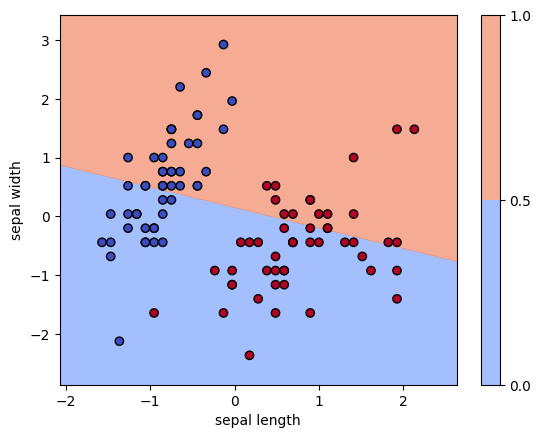

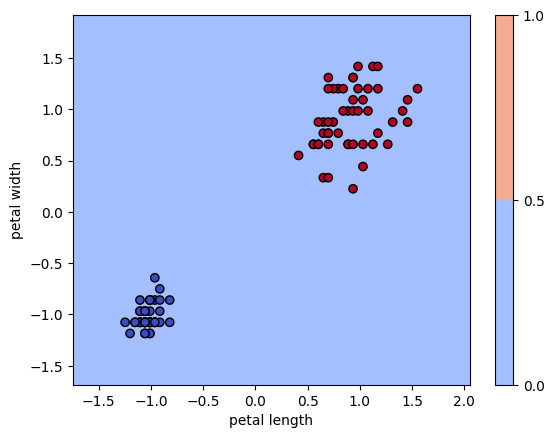

In [10]:
# Combines training and test for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Model data (hypothetical)
weights = neuron.get_weights_bias()  # New weights and bias.

model_weights = np.array([weights[0][0], weights[0][1]])
model_bias = weights[-1]
# Plot decision boundary and points
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, feature_idx1=0, feature_idx2=1
)
plt.show()

model_weights = np.array(
    [weights[0][2], weights[0][3]]
)  # Replace with your actual weights
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, feature_idx1=2, feature_idx2=3
)

plt.show()

## 1.2 - training the perceptron.

Note that here the weight update algorithm is all contained in the `backpropagation` method, where we only put the training parameters as input.

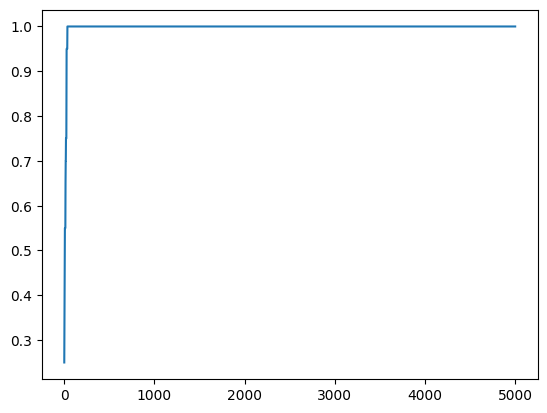

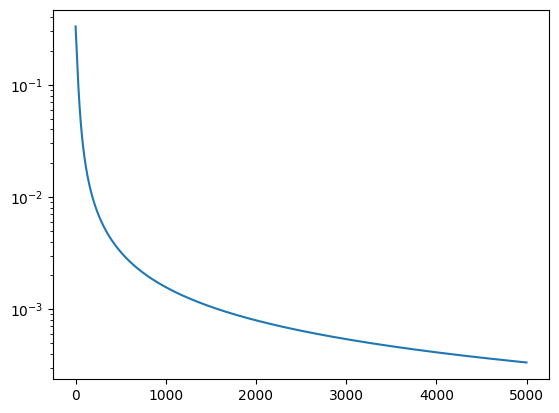

In [11]:
Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(5000):
    y_pred = neuron.forward(X_train)
    neuron.backpropagation(X_train, y_train, y_pred, learning_rate=0.1)
    mse = mean_squared_error(y_train, y_pred)

    y_pred_test = [1 if neuron.forward(i) > 0.5 else 0 for i in X_test]

    accuracy = accuracy_score(y_test, y_pred_test)
    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avaliação
plt.plot(Loss_acuracia)
plt.show()
plt.plot(Loss_mse)
plt.yscale("log")
plt.show()

The trained weights and bias will then be given by

In [12]:
weights = neuron.get_weights_bias()  # Novos pesos e bias.
weights

(array([ 1.04423611, -0.78998543,  1.72020403,  1.70092244]),
 array([0.43774417]))

In [13]:
weights[0]

array([ 1.04423611, -0.78998543,  1.72020403,  1.70092244])

Após o treinamento teremos a seguinte fronteira de decisão

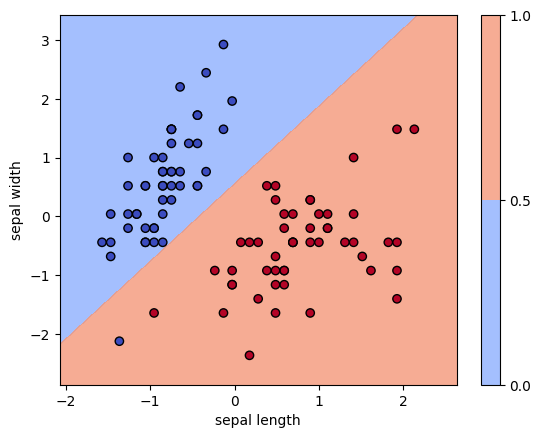

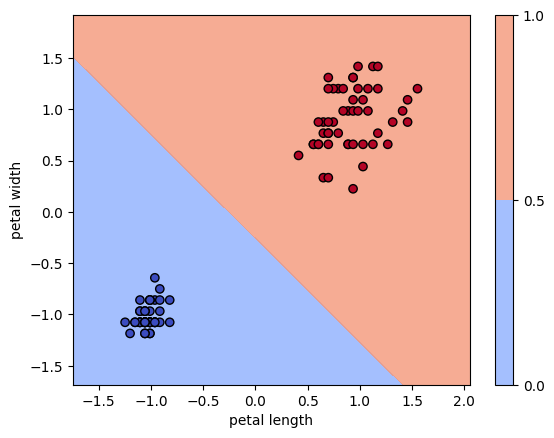

In [14]:
# Combine train and test for plotting
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Model data (hypothetical)
weights = neuron.get_weights_bias()  # New weights and bias.

model_weights = np.array([weights[0][0], weights[0][1]])
model_bias = weights[-1]
# Plot decision boundary and points
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, feature_idx1=0, feature_idx2=1
)
plt.show()

model_weights = np.array(
    [weights[0][2], weights[0][3]]
)  # Replace with your actual weights
plot_decision_boundary(
    X_combined, y_combined, model_weights, model_bias, feature_idx1=2, feature_idx2=3
)

plt.show()

# 2 - Introduction to the PyTorch library 🚀 .


![PyTorch Logo](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)
## What is PyTorch?

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab (FAIR). Since its release, it has become one of the most popular tools among machine learning researchers and engineers due to its flexibility and efficiency. PyTorch is especially known for its ease of use and ability to facilitate rapid prototyping.

## What is PyTorch used for?

PyTorch serves several purposes in the field of machine learning and deep learning:

### 1. **Flexibility in Model Design:** 💡
- **Autograd:** PyTorch offers a dynamic automatic gradient system (Autograd) that allows flexible and intuitive modifications to computation graphs during execution. This is particularly useful for experimental designs where frequent model adjustments are needed.

### 2. **Facilitates Experimentation:** 🧪
- **Simplicity and Intuitiveness:** The easy-to-use interface allows developers and researchers to quickly build deep learning model prototypes, which accelerates the experimentation and development process.

### 3. **Model Training Performance:** ⚙️
- **GPU Acceleration:** PyTorch offers extensive support for GPU acceleration, making it possible to train complex models faster. CUDA integration ensures that the process is efficient and scalable.

### 4. **Practical Applications:** 🏭
- **From Academic Research to Production:** PyTorch not only facilitates academic research and development but is also effective in implementing solutions in production. This is possible thanks to TorchScript, which is a way to convert PyTorch models into formats that can be optimized for production environments.

For more information, visit the [official PyTorch website](https://pytorch.org/).


## 2.1 - Learning to create a perceptron.

* 1st - Import the necessary libraries: We will need torch for tensor operations and torch.nn for neural network layers and models.

* 2nd - Define the Perceptron class: We will create a class that inherits from torch.nn.Module. In this class, we will define the linear layer (weights and bias). Forward Pass: We will define the forward method that performs the forward pass (output calculation) of the perceptron.

* 3rd - Initialize the Perceptron: In the class constructor, we will initialize the linear layer.

Importing the libraries

In [15]:
# 1st Step
import torch as tc
import torch.nn as nn

Declaring the Perceptron class

In [16]:
# 2nd Step
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        output = 1

        # Define the linear layer with input_dim inputs and 1 output.
        self.linear_calculation = nn.Linear(input_dim, output)

        # Define the non-linear function.
        self.activation_function = nn.Sigmoid()

    def forward(self, x):
        return self.activation_function(self.linear_calculation(x))

An important part within the perceptron is given by the function `nn.Linear(input_dim, 1)`.

It is responsible for the mathematical part Eq.(2) described in the article. For the code, it is important to know that `input_dim=` is the number of inputs (in our problem there are 4) and the output, as the name itself indicates, is the number of outputs of the perceptron.

Our dataset consists of 80 rows (data points) and 4 columns (features).

In [17]:
X_train.shape

(80, 4)

Initializing the Perceptron

In [18]:
# 3rd step
perceptron = Perceptron(input_dim=X_train.shape[-1])
# The input dimension must be equal to the number of columns in your dataset
# or equal to the number of features.
# For the iris dataset, the first term of X_train.shape
# is the number of data points, the second is the number of columns.

If we try to execute the forward method with the iris dataset, we will have problems.
Due to the data type, which are numpy arrays so far.

In [19]:
type(X_train)

numpy.ndarray

We need all the data to be in the PyTorch library format (tensor), i.e., they need to be tensors. Therefore, we will convert the training and testing variables.

In [20]:
tc.tensor(X_train[0])

tensor([ 1.8202, -0.4416,  1.4105,  0.9838], dtype=torch.float64)

In [21]:
X_train = tc.tensor(X_train, dtype=tc.float32)
X_test = tc.tensor(X_test, dtype=tc.float32)
y_train = tc.tensor(y_train, dtype=tc.float32)
y_test = tc.tensor(y_test, dtype=tc.float32)

Note that it was converted to a specific variable type `dtype=tc.float32`, which is the default mode for variable conversion.

Usually, we don't need to specify it, but in this case, we do because the variable is being converted to `dtype=tc.float64`, occupying unnecessary memory space for our type of application. Therefore, it is good practice, in this case, to restrict the variable size and consequently free up memory space.

In [22]:
X_train[0]

tensor([ 1.8202, -0.4416,  1.4105,  0.9838])

With the data converted to tensors, we can insert them as input to the perceptron.

In [23]:
saida = perceptron(X_train)
saida[0:5]

tensor([[0.1714],
        [0.3736],
        [0.6980],
        [0.7670],
        [0.3599]], grad_fn=<SliceBackward0>)

Naturally, when adding the training data to the perceptron argument, the forward method will already be executed. In the cell above, we are displaying only the first 5 outputs, referring to the first 5 input values.

In [24]:
saida.shape

torch.Size([80, 1])

Another important detail is that the output of the perceptron has the shape [80, 1], so $y_{train}$ must necessarily have the same shape. However, note that

In [25]:
y_train.shape

torch.Size([80])

Note that, computationally, a vector with dimension $(80,1)$ does not have the same dimension as one that is $(80)$. 
To reformat, and both quantities can be compared, we will use:

In [26]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

## 2.2 - How to train a perceptron.

Part of the procedure is the same as in previous cases, but now we have to specify some points such as the optimizer and the cost function.

In [27]:
# Define the loss function and the optimizer
loss_function = nn.MSELoss()  # Mean Squared Error
optimizer = tc.optim.Adam(
    perceptron.parameters(), lr=0.1
)  # Stochastic Gradient Descent Optimizer

And the training as

In [28]:
# Train the perceptron
num_epochs = 1000  # Number of epochs to train
print_interval = num_epochs // 10  # Calculate the interval to print 10 times
for epoch in range(num_epochs):
    # Zero the gradients of the optimizer
    optimizer.zero_grad()

    # Forward pass: Calculate the perceptron prediction
    outputs = perceptron(X_train)

    # Calculate the loss
    loss = loss_function(outputs, y_train)

    # The next two steps are backpropagation steps
    # Backward pass: Calculate the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

    # Print the loss
    # Condition to print the loss 10 times during training
    if (epoch % print_interval == 0) or (epoch == num_epochs - 1):
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.7f}")

Epoch [1/1000], Loss: 0.5172293
Epoch [101/1000], Loss: 0.0003745
Epoch [201/1000], Loss: 0.0002490
Epoch [301/1000], Loss: 0.0001776
Epoch [401/1000], Loss: 0.0001334
Epoch [501/1000], Loss: 0.0001041
Epoch [601/1000], Loss: 0.0000836
Epoch [701/1000], Loss: 0.0000687
Epoch [801/1000], Loss: 0.0000575
Epoch [901/1000], Loss: 0.0000488
Epoch [1000/1000], Loss: 0.0000420


Let's visualize the results

In [29]:
# Obtaining the model weights and bias
weights_tc = perceptron.linear_calculation.weight.data.numpy()[0]
bias_tc = perceptron.linear_calculation.bias.data.numpy()
weights_tc, bias_tc

(array([ 1.6613714, -1.2176552,  2.2366896,  2.1650095], dtype=float32),
 array([0.8070862], dtype=float32))

In [30]:
def plot_decision_boundary(
    X, y, model_weights, model_bias, feature_idx1=0, feature_idx2=1
):
    """
    Plots the decision boundary for a binary classification model along with the input data.

    """
    # Define plot limits
    x_min, x_max = X[:, feature_idx1].min() - 0.5, X[:, feature_idx1].max() + 0.5
    y_min, y_max = X[:, feature_idx2].min() - 0.5, X[:, feature_idx2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    val = np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias
    # Predict for each point in the meshgrid
    Z = tc.sigmoid(tc.tensor(val))
    Z = Z.reshape(xx.shape)

    # Contour and fill
    plt.contourf(
        xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm
    )
    plt.colorbar()

    # Plot data points
    plt.scatter(
        X[:, feature_idx1],
        X[:, feature_idx2],
        c=y,
        edgecolors="k",
        cmap=plt.cm.coolwarm,
    )
    plt.xlabel(f"{iris.feature_names[feature_idx1]}")
    plt.ylabel(f"{iris.feature_names[feature_idx2]}")

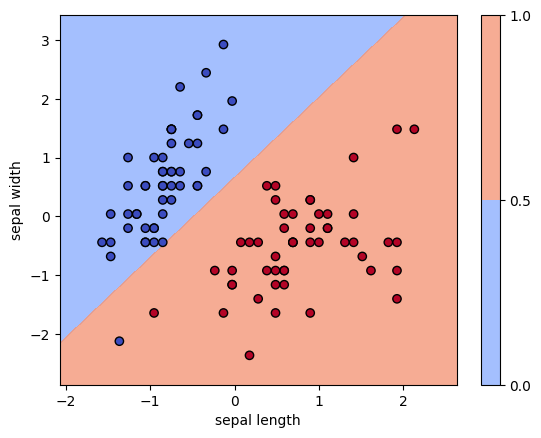

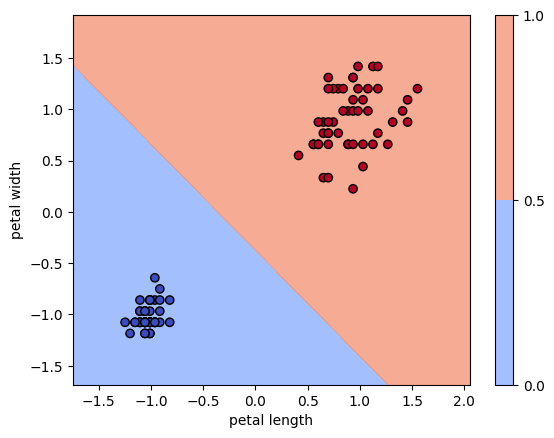

In [31]:
model_weights = np.array([weights_tc[0], weights_tc[1]])

# Plot the decision boundary and points
plot_decision_boundary(
    X_combined, y_combined, model_weights, bias_tc, feature_idx1=0, feature_idx2=1
)
plt.show()

model_weights = np.array(
    [weights_tc[2], weights_tc[3]]
)  # Replace with your actual weights
plot_decision_boundary(
    X_combined, y_combined, model_weights, bias_tc, feature_idx1=2, feature_idx2=3
)

plt.show()

# Exercise

## Exercise Proposal

Rewrite the previous code, but now replace the Mean Squared Error (MSE) loss function with new metrics. Try implementing one or more of the following loss functions:

- **Sigmoid Cross Entropy Loss (Binary Cross Entropy):** Use `nn.BCELoss()` or `nn.BCEWithLogitsLoss()` in PyTorch.
- **Hinge Loss:** Implement the hinge loss manually or use available PyTorch functions.
- **Weighted Cross Entropy:** Use `nn.BCEWithLogitsLoss(pos_weight=...)` to handle class imbalance.

Update the training loop to use the new loss function(s) and compare the results. Discuss how the choice of loss function affects the training and performance of your perceptron model and compare with de MSE metrics.